In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_fixed.csv',sep=';')

In [5]:
"""
1960 tronaduras registradas
"""
df.shape

(1960, 28)

In [7]:
df.columns

Index(['Fase', 'Banco', 'Tipo de tronadura', 'Tipo Material', 'M',
       'Dominio Estructural', 'Diámetro', 'BxS', 'Tiempo entre Pozos Filas ms',
       'Fc', 'Tipo Explosivo', 'P10', 'P20', 'P30', 'P40', 'P50', 'P60', 'P70',
       'P80', 'P90', 'P100', 'Este', 'Norte', 'Cota', 'B', 'S', 'tiempo_1',
       'tiempo_2'],
      dtype='object')

In [8]:
EXCLUDE_COLUMNS = ['Tiempo entre Pozos Filas ms', 'BxS']

In [125]:
"""
Inspect Categorical

Etapa 4 y 2 son las que mas registros tienen
Tronadura 2 concentra el 86% de los datos
4 explosivos que se usan mucho mas que el resto B,C,J,L
"""

for col in df.columns:
    if col not in EXCLUDE_COLUMNS:
        if df[col].dtype == object:
            n_unique = df[col].nunique()
            print('{}, {} valores unicos'.format(col, n_unique))
            display(df[col].value_counts())
            print('------------------------------')

Fase, 6 valores unicos


Stage 4    1121
Stage 2     754
Stage 6      42
Stage 1      31
Stage 3       9
Stage 5       3
Name: Fase, dtype: int64

------------------------------
Tipo de tronadura, 2 valores unicos


Tronadura 2    1687
Tronadura 1     273
Name: Tipo de tronadura, dtype: int64

------------------------------
Tipo Material, 4 valores unicos


Roca 1     1104
Roca 2      813
Lastre       42
Relleno       1
Name: Tipo Material, dtype: int64

------------------------------
M, 6 valores unicos


L4    1082
L1     492
L8     264
L2      74
L3      31
L7      17
Name: M, dtype: int64

------------------------------
Dominio Estructural, 5 valores unicos


Norte       1225
Noreste      639
Sureste       73
Noroeste      22
Este           1
Name: Dominio Estructural, dtype: int64

------------------------------
Tipo Explosivo, 10 valores unicos


B    697
C    641
J    246
L    179
K     72
F     68
E     52
H      2
M      2
G      1
Name: Tipo Explosivo, dtype: int64

------------------------------


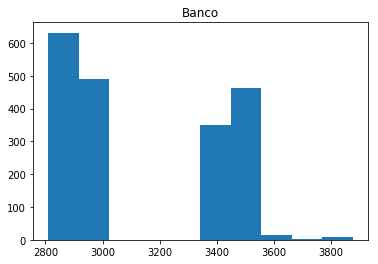

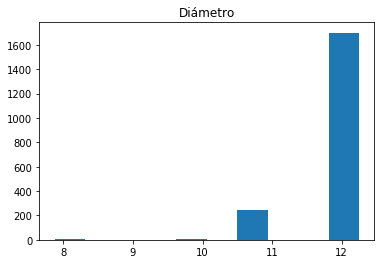

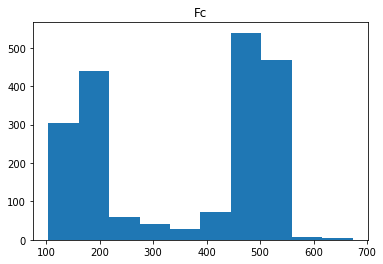

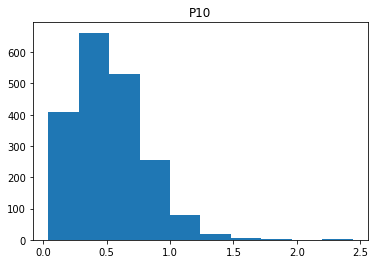

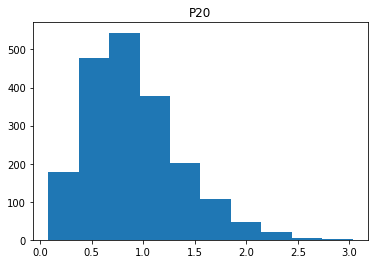

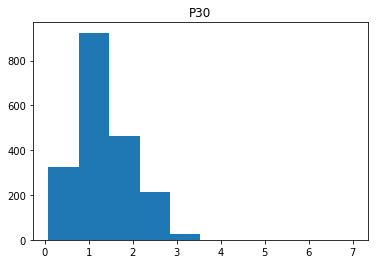

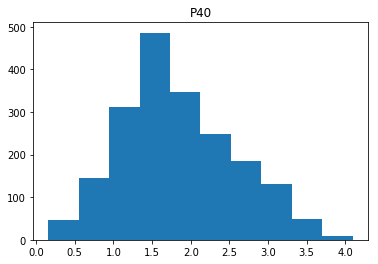

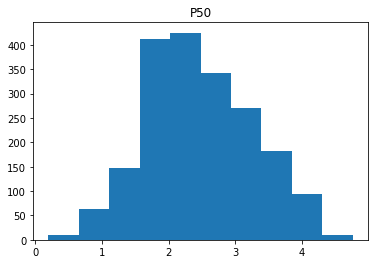

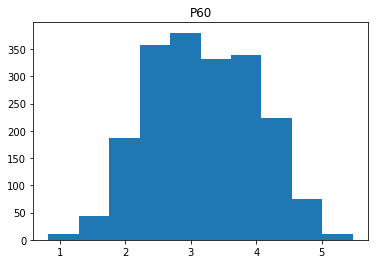

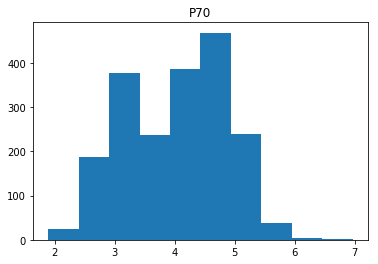

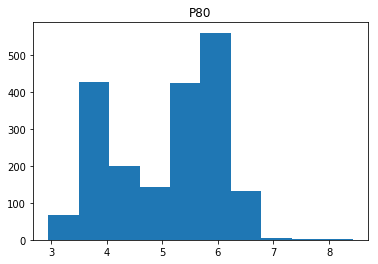

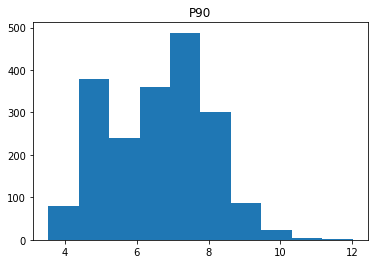

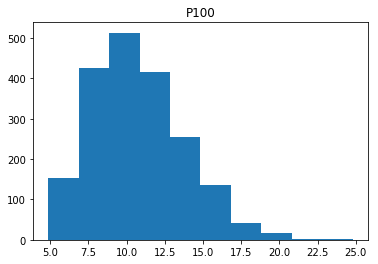

c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


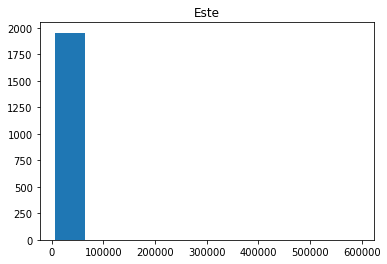

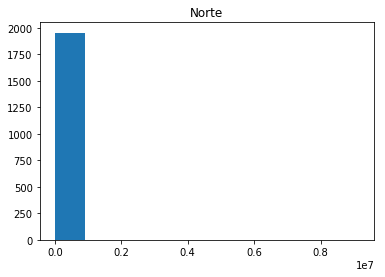

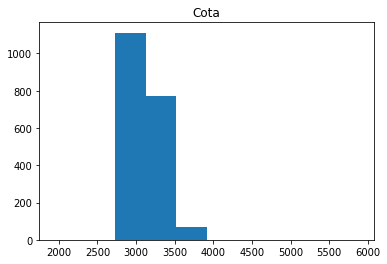

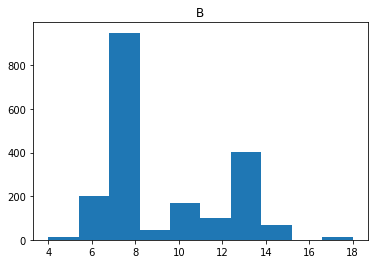

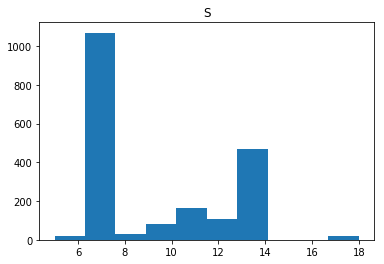

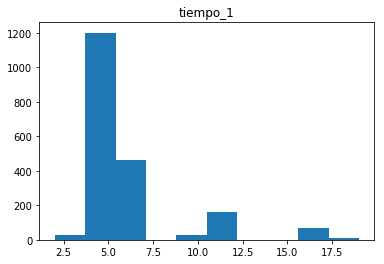

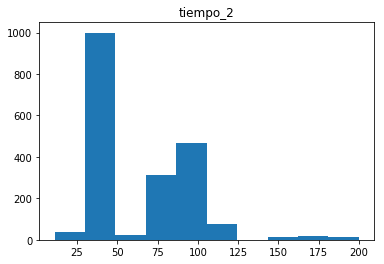

In [24]:
"""
Inspect Numerical
"""

for col in df.columns:
    if col not in EXCLUDE_COLUMNS:
        if df[col].dtype != object:
            plt.hist(df[col])
            plt.title(col)
            plt.show()

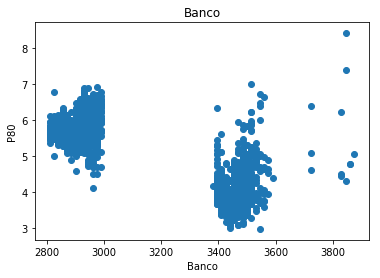

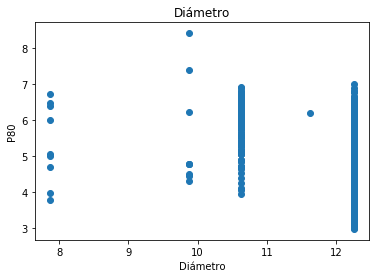

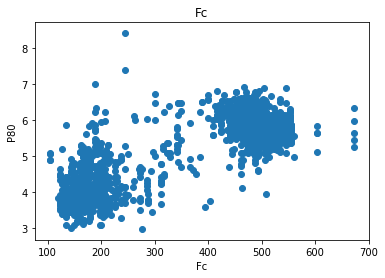

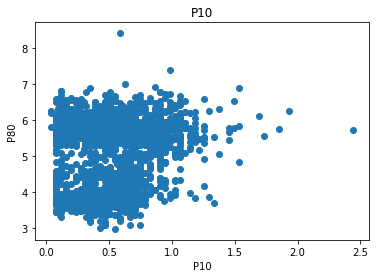

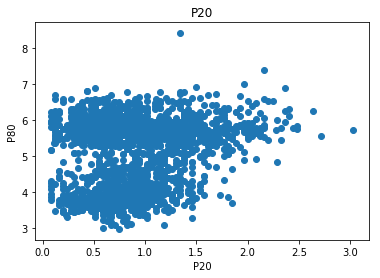

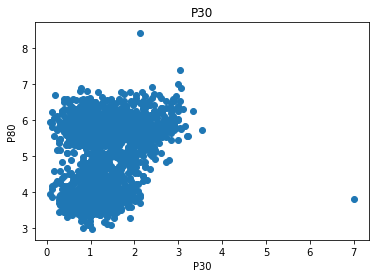

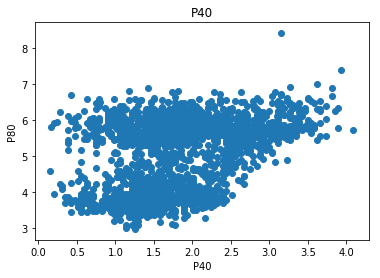

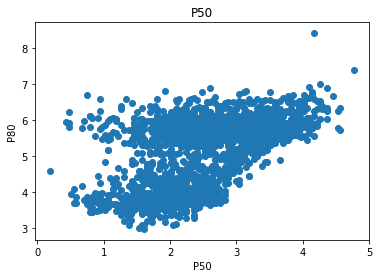

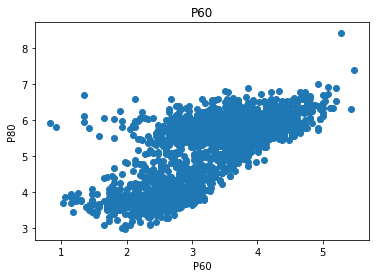

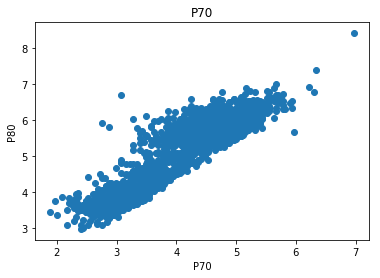

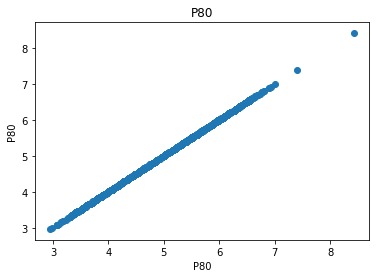

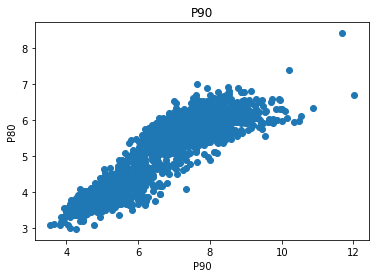

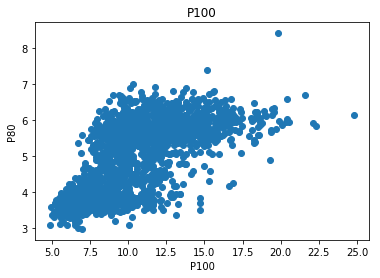

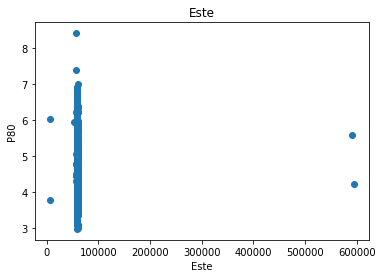

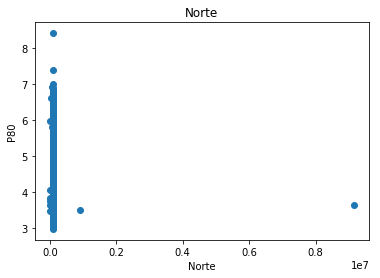

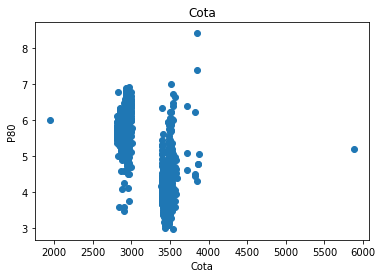

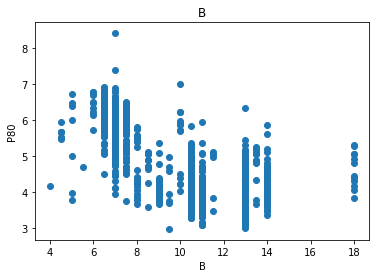

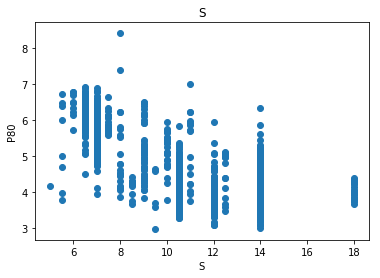

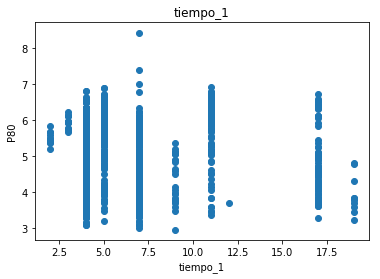

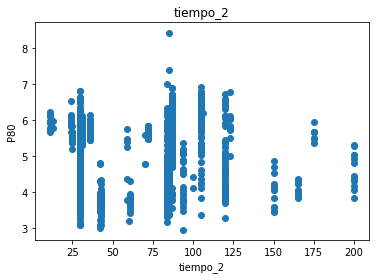

In [26]:
for col in df.columns:
    if col not in EXCLUDE_COLUMNS:
        if df[col].dtype != object:
            plt.scatter(df[col], df['P80'])
            plt.xlabel(col)
            plt.ylabel('P80')
            plt.title(col)
            plt.show()

In [ ]:
"""
Entre los 2800 y 3000 m de altura el material tiene a ser mas grande que el generado entre 3400 y 3600.
Sobre los 3800 m el resultado es mas disperso

La tendencia es que a medida que aumenta FC aumenta el tamaño del material fragmentado

En cuanto a burden y espaciamiento se tiene una curva similar a una normal skewed a la izquierda

Para la fase se tiene que entre las etapas 1 a 4 el material fragmentado aumenta de tamaño y en las etapas 5 y 6 disminuye

La tronadura tipo 1 produce material mas grande que la tipo 2

La roca tipo 1 se fragmenta en un material de mayor tamaño de la roca tipo 2, mientras que el tamaño del laster es mas disperso
"""

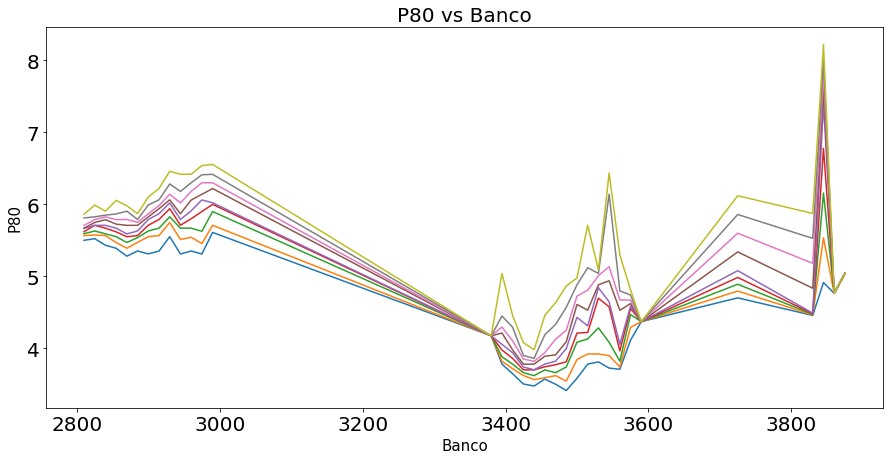

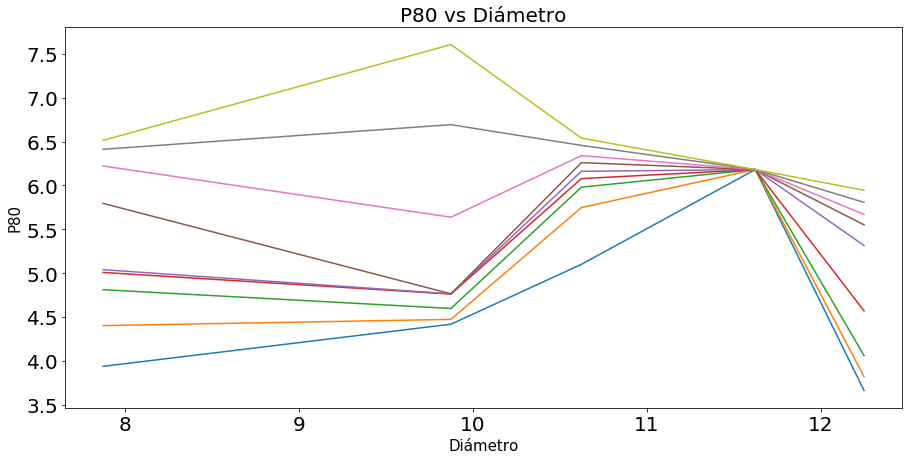

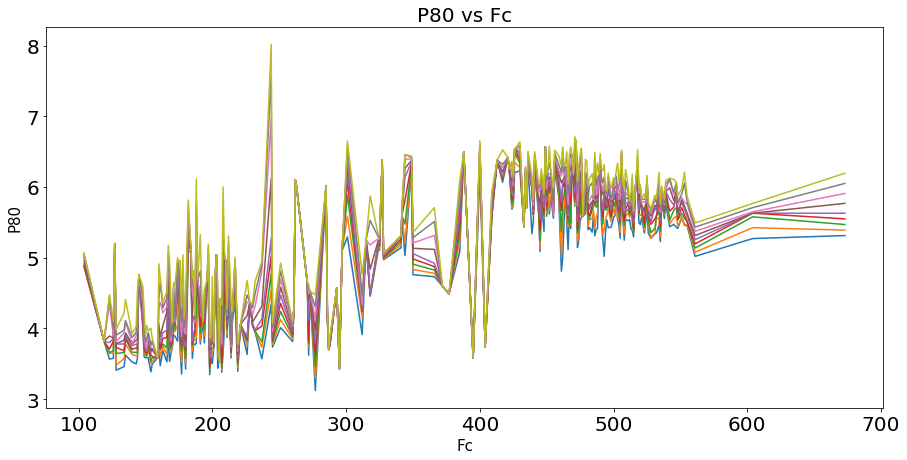

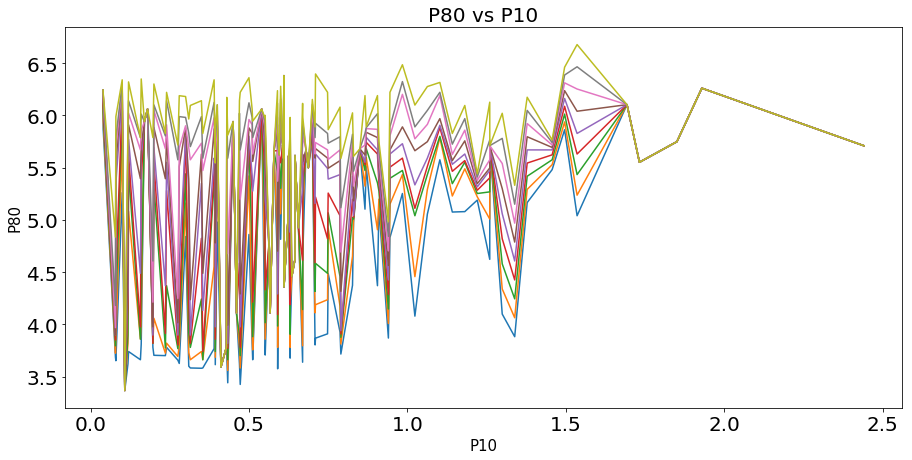

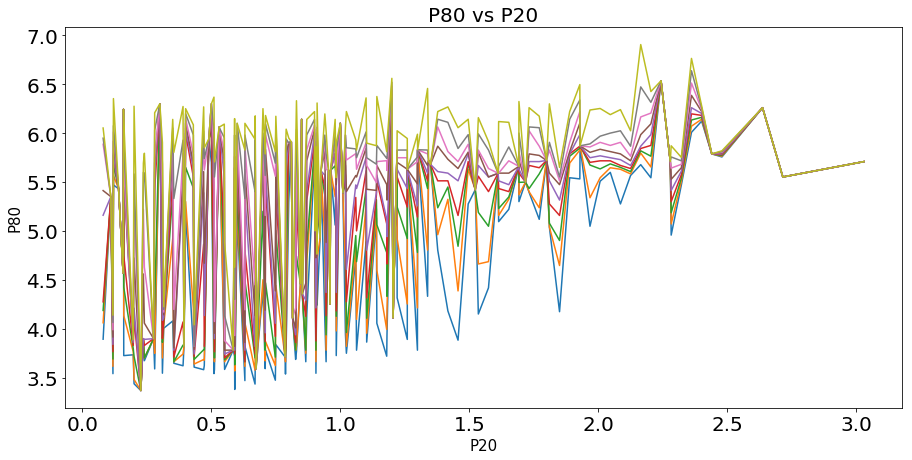

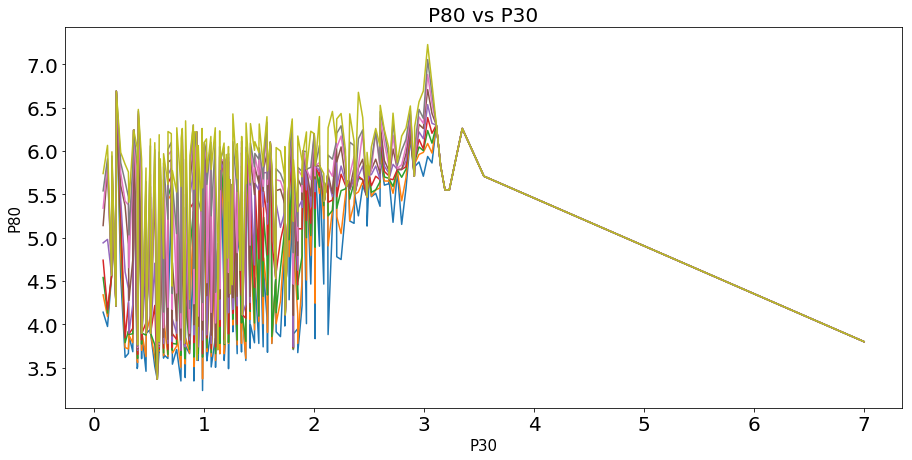

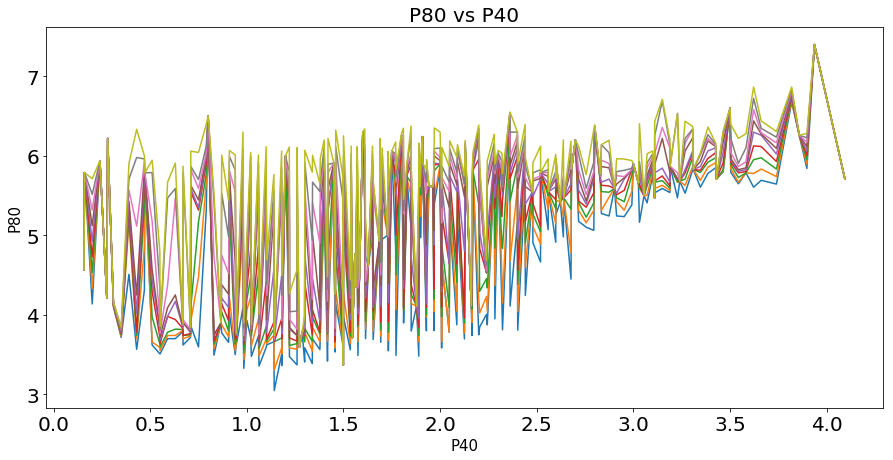

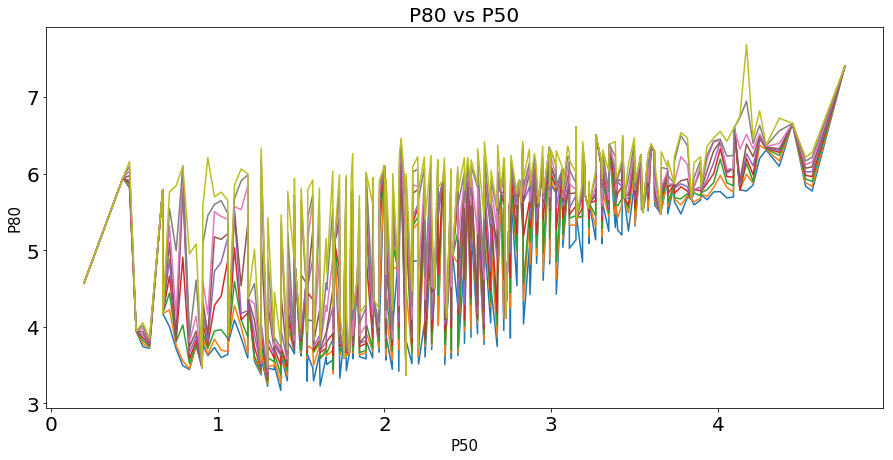

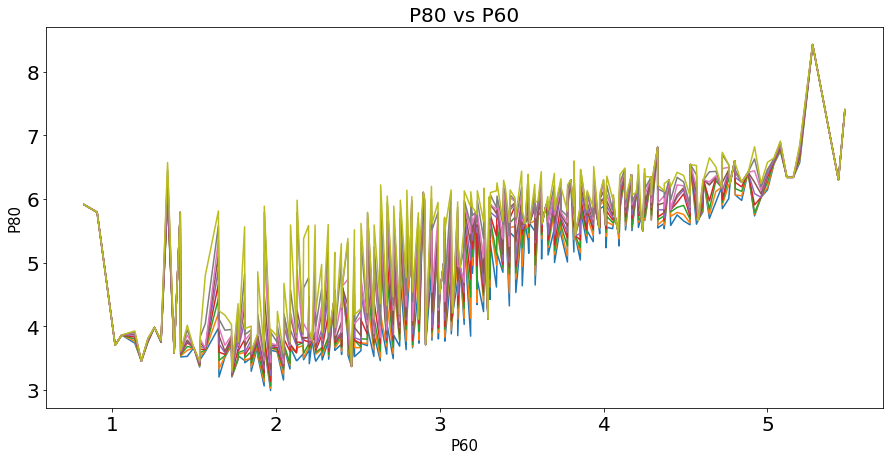

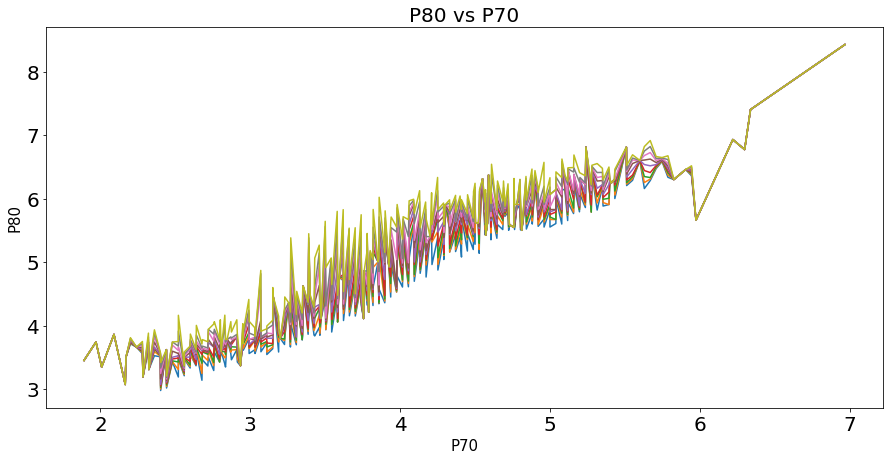

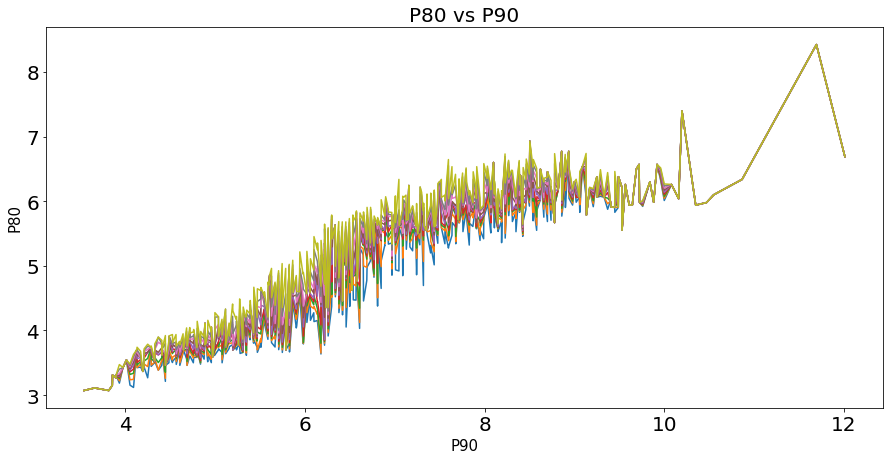

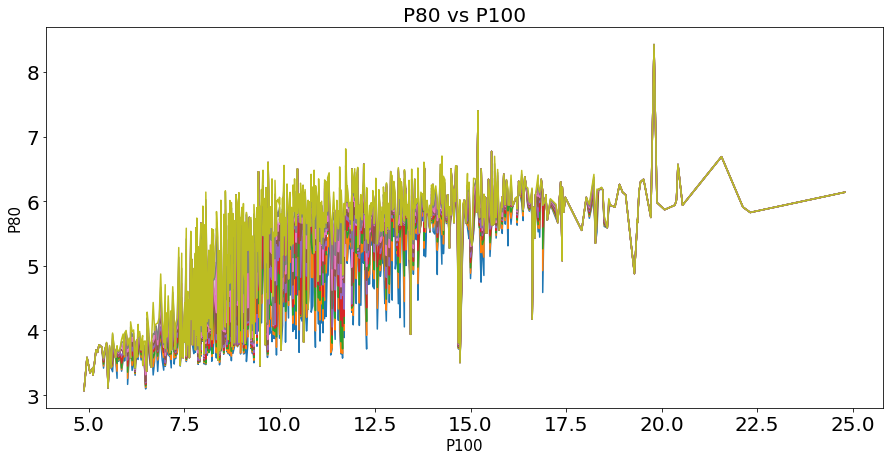

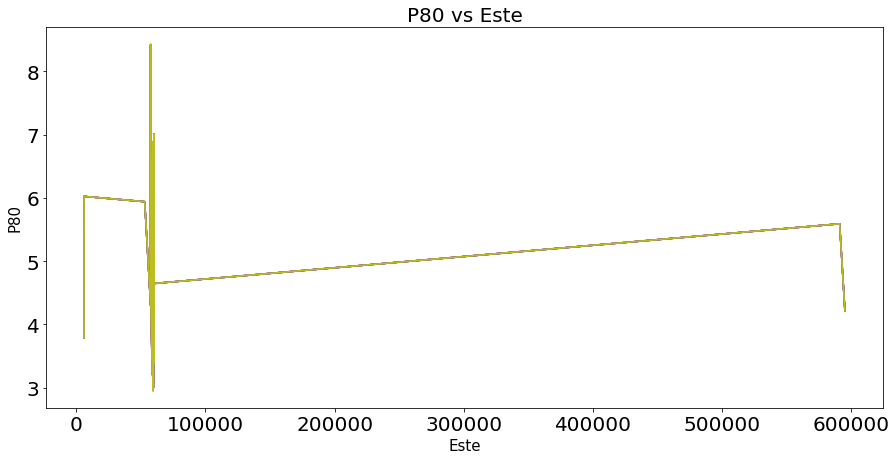

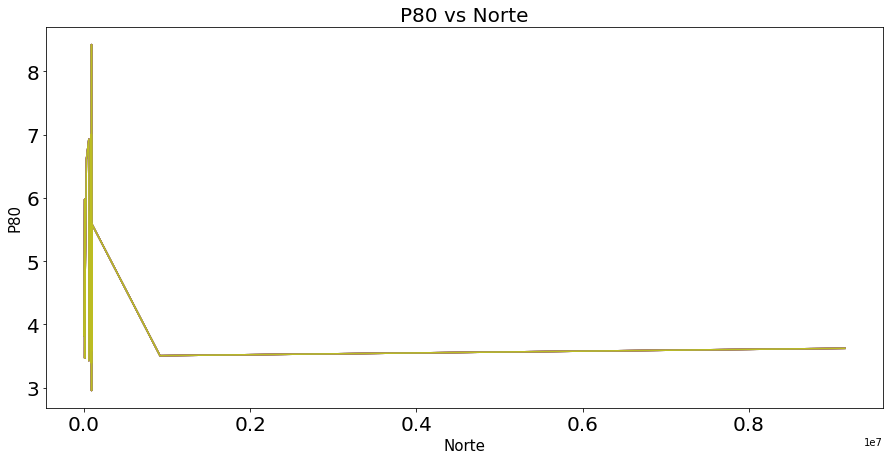

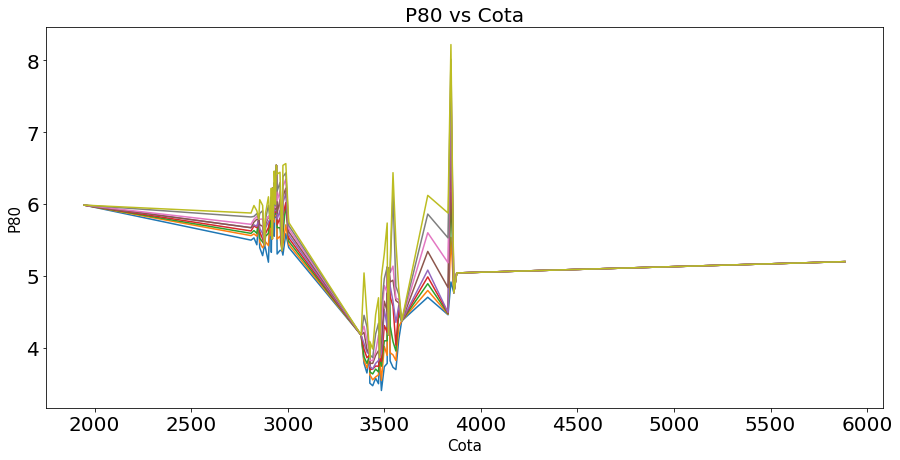

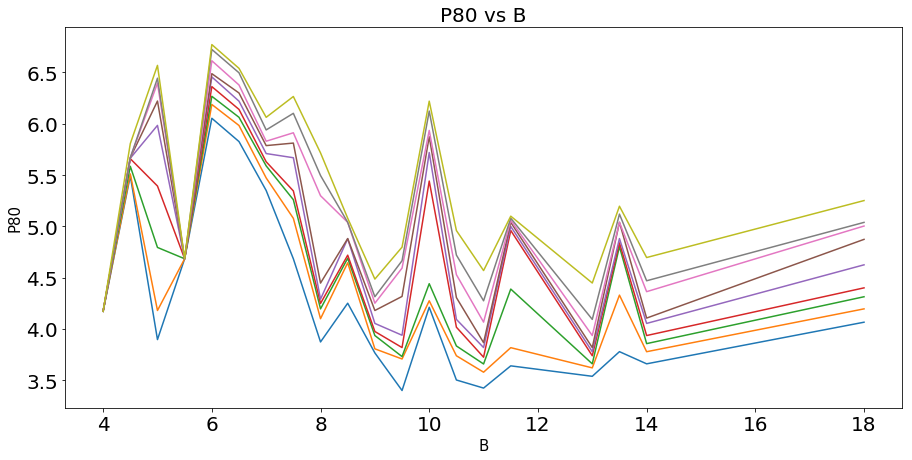

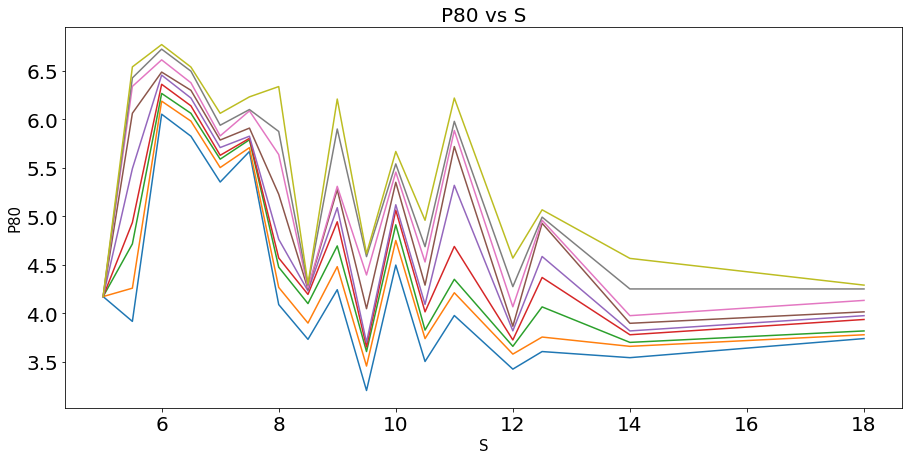

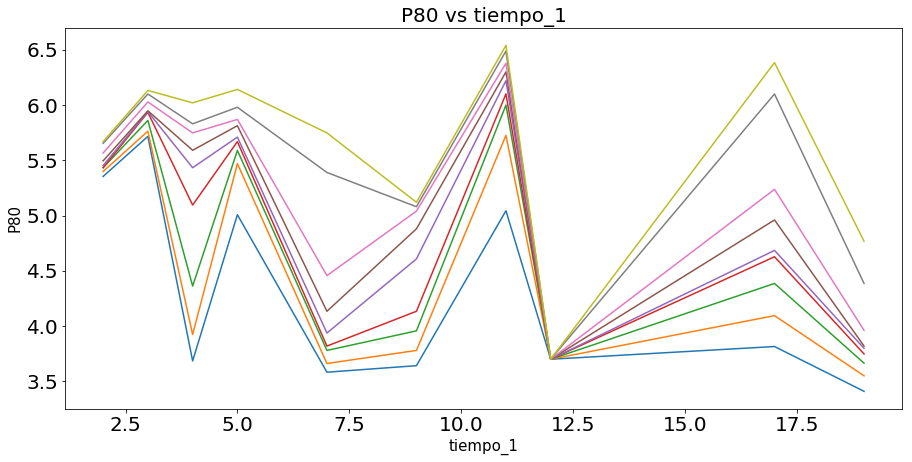

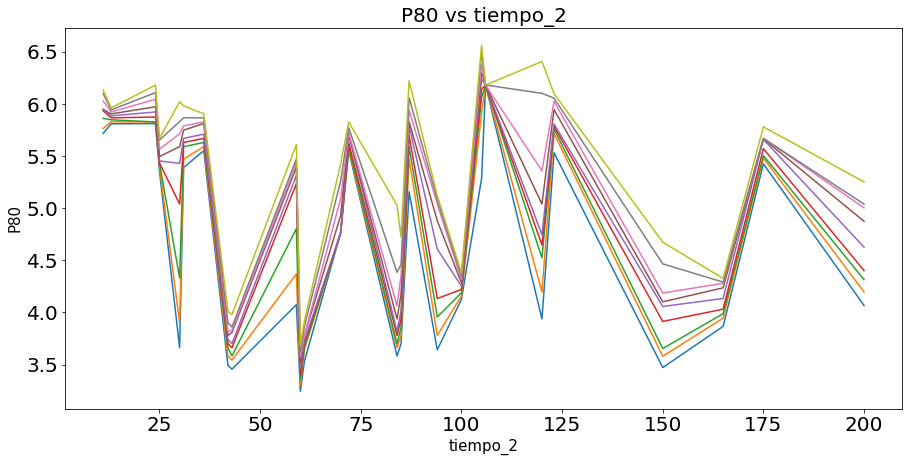

In [49]:
PERS = [10, 20, 30, 40, 50, 60, 70, 80, 90]
TARGET = 'P80'
for col in df.columns:
    if col not in EXCLUDE_COLUMNS+[TARGET]:
        if df[col].dtype != object:
            plt.figure(figsize=(15,7))
            for PER in PERS:
                tmp = df[[col,TARGET]].groupby(by=col).quantile(PER/100).reset_index()
                plt.plot(tmp[col], tmp['P80'])
            plt.title(TARGET + ' vs ' + col, fontsize=20)
            plt.xlabel(col, fontsize=15)
            plt.ylabel(TARGET, fontsize=15)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.show()

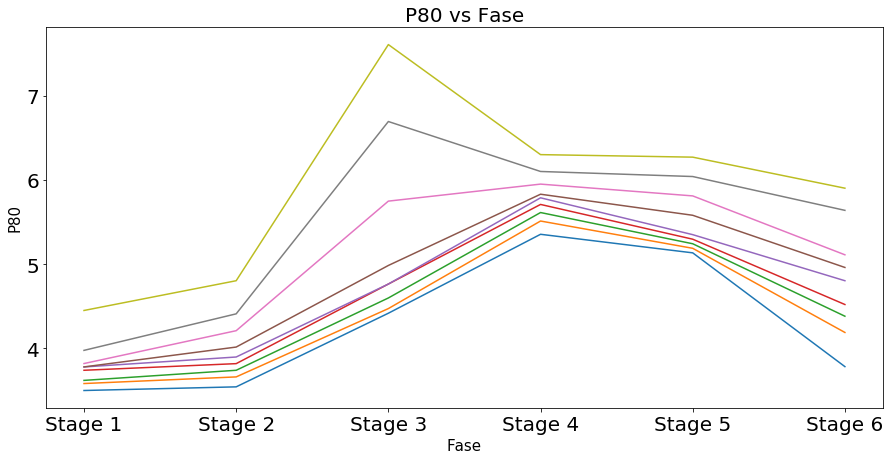

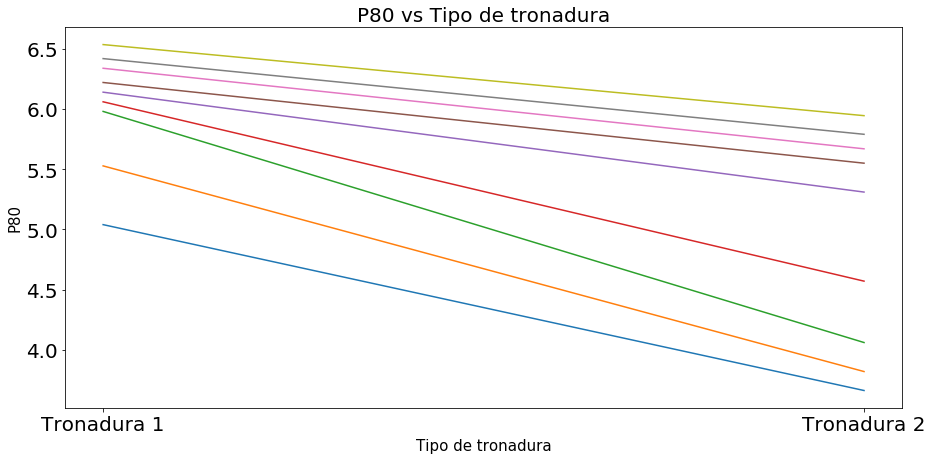

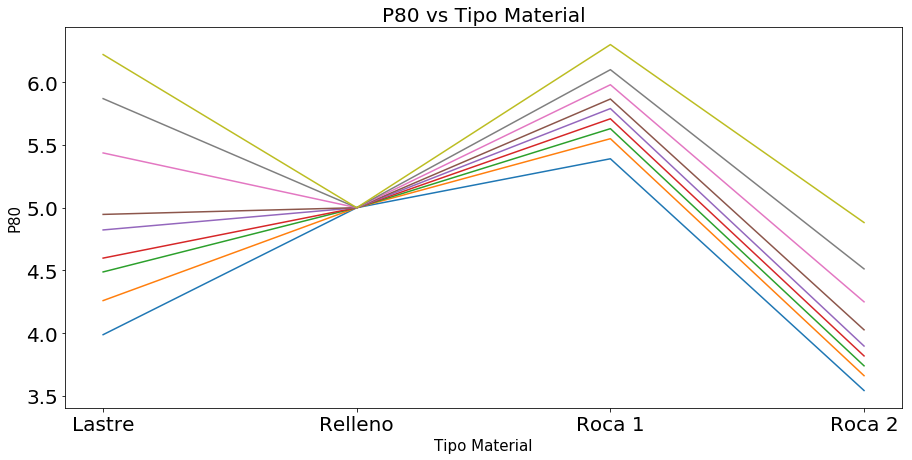

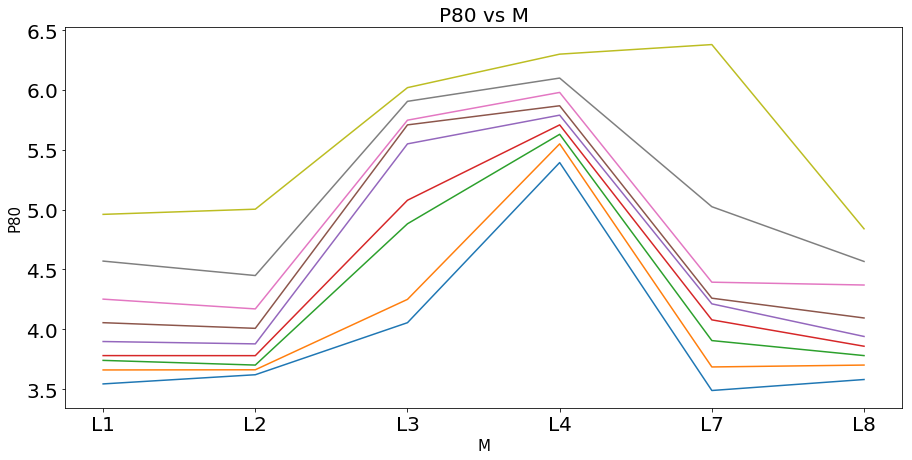

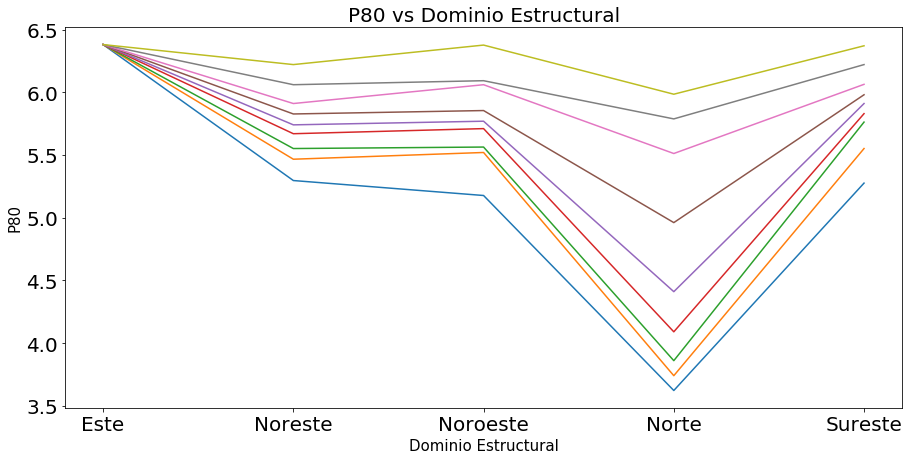

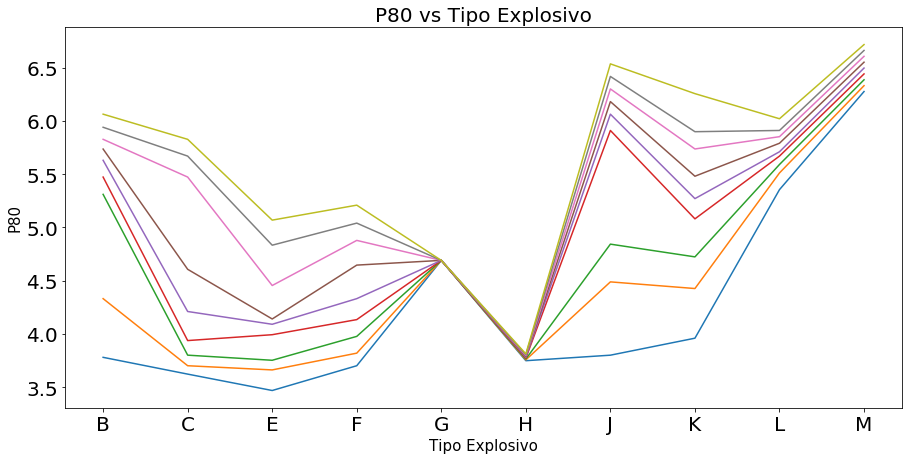

In [50]:
PERS = [10, 20, 30, 40, 50, 60, 70, 80, 90]
TARGET = 'P80'
for col in df.columns:
    if col not in EXCLUDE_COLUMNS:
        if df[col].dtype == object:
            plt.figure(figsize=(15,7))
            for PER in PERS:
                tmp = df[[col,TARGET]].groupby(by=col).quantile(PER/100).reset_index()
                plt.plot(tmp[col], tmp['P80'])
            plt.title(TARGET + ' vs ' + col, fontsize=20)
            plt.xlabel(col, fontsize=15)
            plt.ylabel(TARGET, fontsize=15)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.show()

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
clf = DecisionTreeRegressor()

In [55]:
COLS = ['Fase', 'Banco', 'Tipo de tronadura', 'Tipo Material', 'M',
       'Dominio Estructural', 'Diámetro', 'BxS', 'Tiempo entre Pozos Filas ms',
       'Fc', 'Tipo Explosivo', 'Este', 'Norte', 'Cota', 'B', 'S', 'tiempo_1',
       'tiempo_2']

In [126]:
NUMERIC_FEATURES = ['Banco',
                     'Diámetro',
                     'Fc',
                     'B',
                     'S',
                     'tiempo_1',
                     'tiempo_2']

CATEGORICAL_FEATURES = ['Fase','Tipo de tronadura','Tipo Material',
                        'M','Dominio Estructural', 'Tipo Explosivo']

In [93]:
encoder = {}
for col in CATEGORICAL_FEATURES:
    encoder[col] = {}
    unique = df[col].unique()
    for i, val in enumerate(unique):
        encoder[col][val] = i

In [95]:
features = df.copy()
for col in CATEGORICAL_FEATURES:
    features[col] = features[col].replace(encoder[col])

In [127]:
X = features[NUMERIC_FEATURES+CATEGORICAL_FEATURES].fillna(0)
y = features['P80']

In [128]:
clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [129]:
fi_df = pd.DataFrame()
fi_df['COLS'] = NUMERIC_FEATURES+CATEGORICAL_FEATURES
fi_df['IMPORTANCE'] = clf.feature_importances_

In [130]:
fi_df = fi_df.sort_values(by='IMPORTANCE', ascending=False)

Text(0.5, 1.0, 'Importancia de Características')

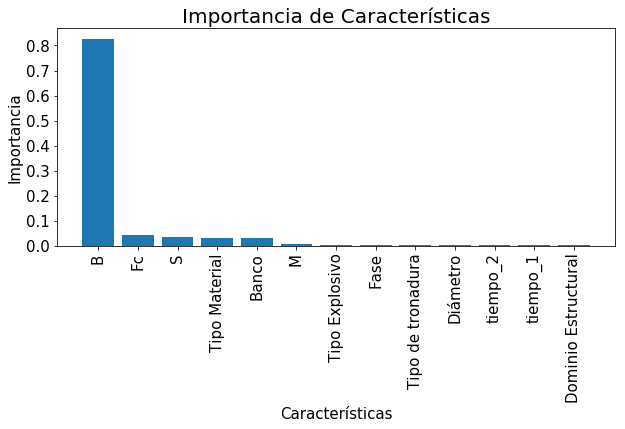

In [131]:
plt.figure(figsize=(10,4))
plt.bar(fi_df['COLS'],fi_df['IMPORTANCE'])
plt.ylabel('Importancia',fontsize=15)
plt.xlabel('Características',fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Importancia de Características', fontsize=20)

In [84]:
y_pred = clf.predict(X)

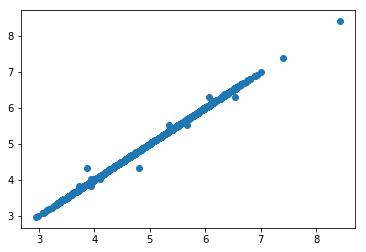

In [85]:
plt.scatter(y,y_pred)
plt.show()